In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("ev_charging_patterns.csv")

In [5]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [7]:
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [8]:
ort1 =df["Energy Consumed (kWh)"].mean()

In [9]:
df["Energy Consumed (kWh)"]= df["Energy Consumed (kWh)"].fillna(ort1)

In [10]:
df["Energy Consumed (kWh)"].isnull().sum()

np.int64(0)

In [11]:
ort2 = df["Charging Rate (kW)"].mean()

In [12]:
df["Charging Rate (kW)"]= df["Charging Rate (kW)"].fillna(ort2)

In [13]:
ort3 = df["Distance Driven (since last charge) (km)"].mean()

In [14]:
df["Distance Driven (since last charge) (km)"]= df["Distance Driven (since last charge) (km)"].fillna(ort3)

In [15]:
df.isnull().sum()

User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64

In [16]:
df["Charging Start Time"] =pd.to_datetime(df["Charging Start Time"])
df["Charging End Time"] =pd.to_datetime(df["Charging Start Time"])

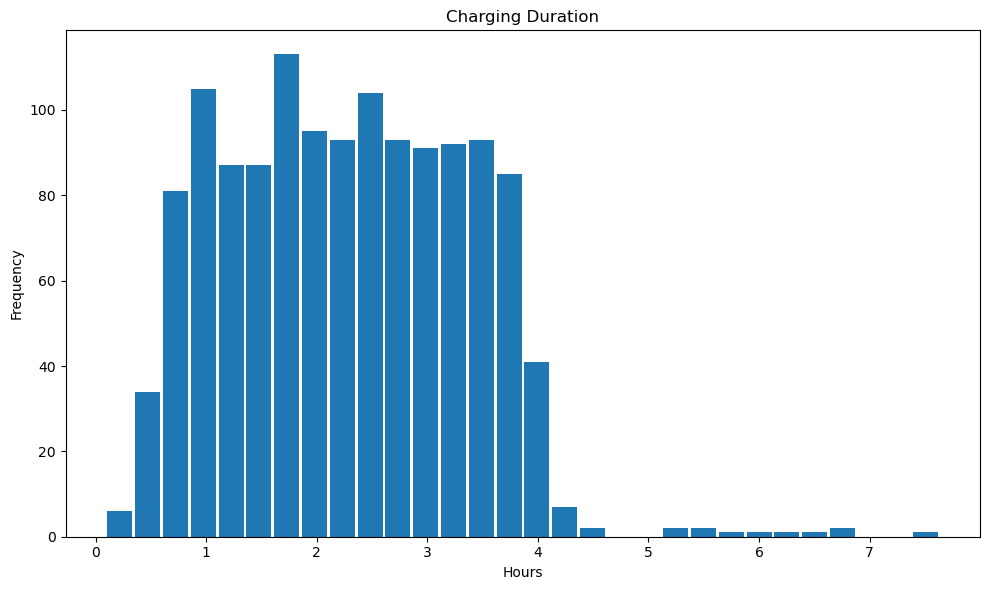

In [17]:
# Şarj süresi
plt.figure(figsize= (10 ,6))
plt.hist(df["Charging Duration (hours)"],bins =30,rwidth=0.9)
plt.title("Charging Duration")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

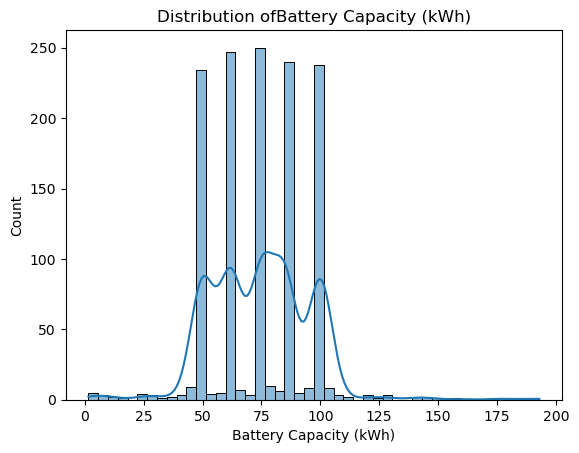

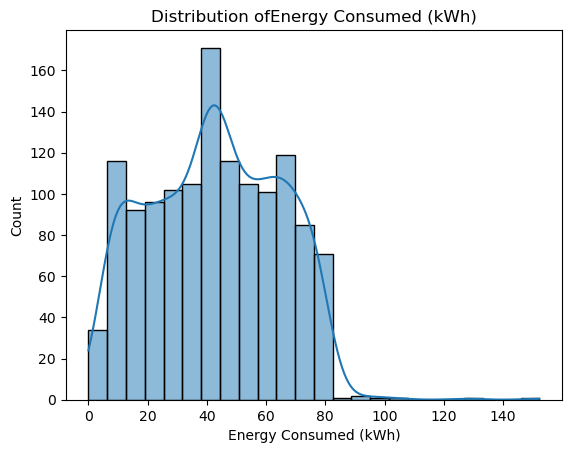

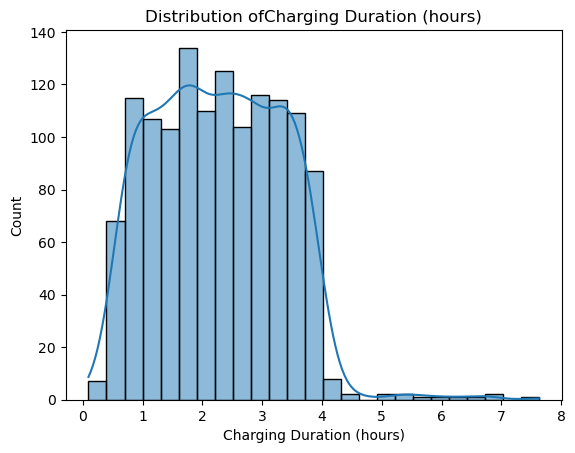

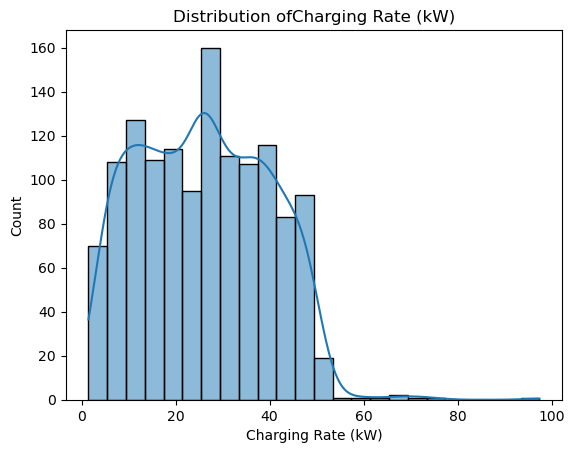

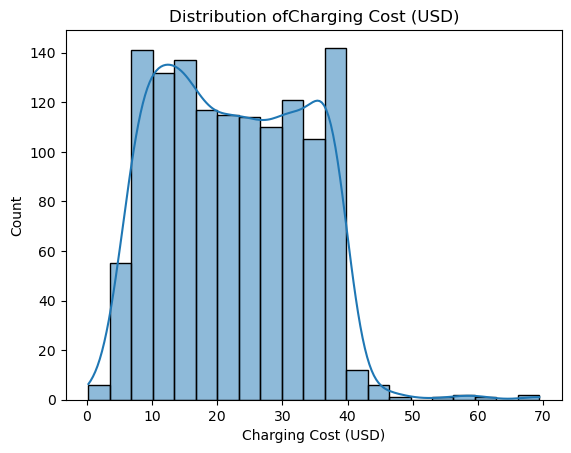

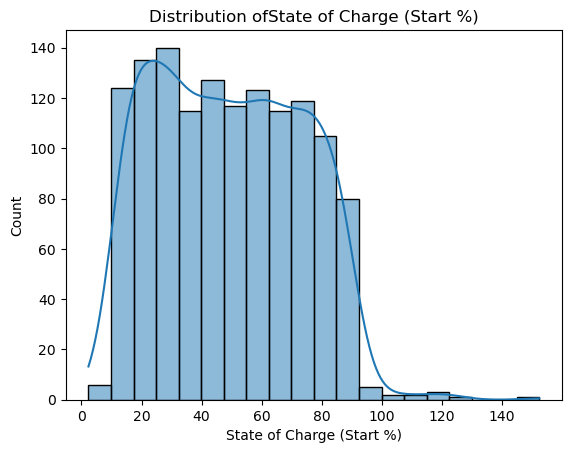

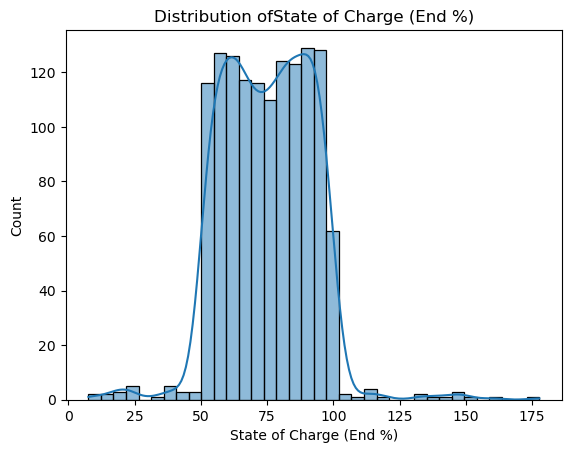

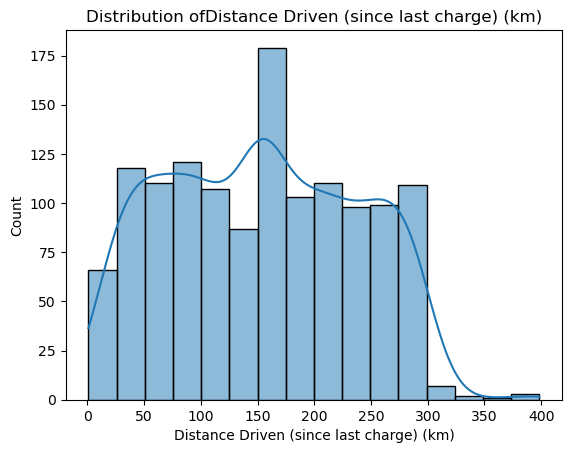

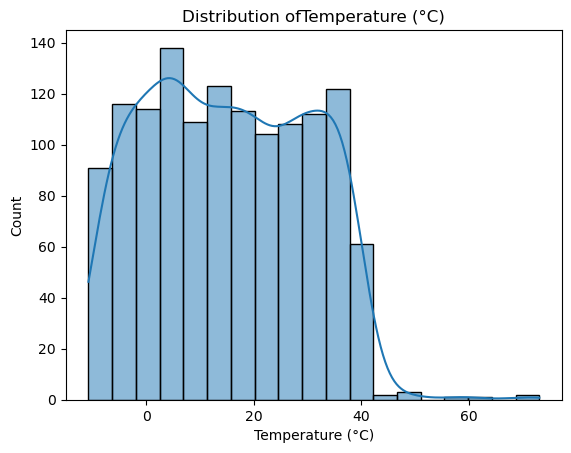

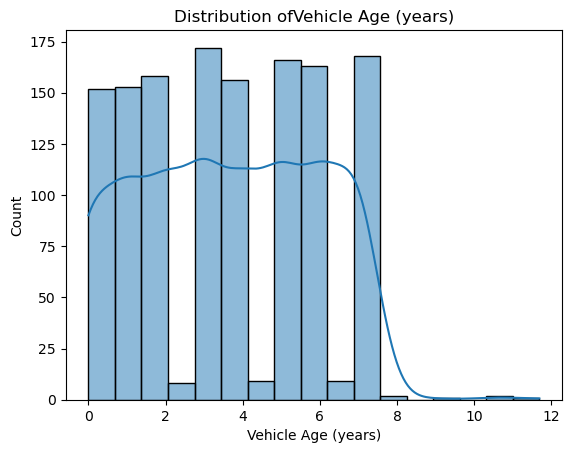

In [18]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of{col}")
    plt.show()

In [19]:
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    print(df[col].value_counts())

User ID
User_1320    1
User_1       1
User_2       1
User_3       1
User_4       1
            ..
User_13      1
User_12      1
User_11      1
User_10      1
User_9       1
Name: count, Length: 1320, dtype: int64
Vehicle Model
Tesla Model 3    280
Hyundai Kona     266
Nissan Leaf      260
BMW i3           258
Chevy Bolt       256
Name: count, dtype: int64
Charging Station ID
Station_108    9
Station_10     7
Station_97     7
Station_17     7
Station_461    7
              ..
Station_473    1
Station_241    1
Station_489    1
Station_22     1
Station_374    1
Name: count, Length: 462, dtype: int64
Charging Station Location
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64
Charging Start Time
2024-02-24 23:00:00    1
2024-01-01 00:00:00    1
2024-01-01 01:00:00    1
2024-01-01 02:00:00    1
2024-01-01 03:00:00    1
                      ..
2024-01-01 12:00:00    1
2024-01-01 11:00:00    1
2024-01-01 10:00:00

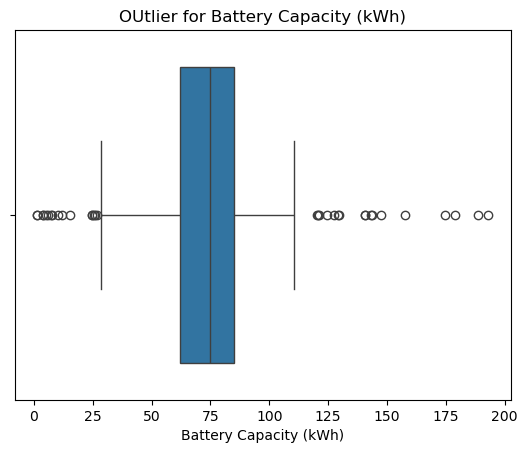

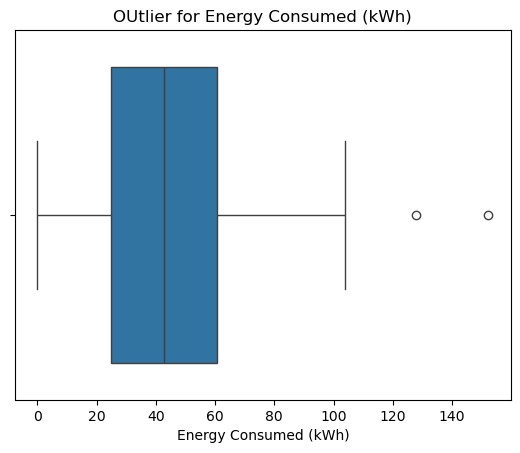

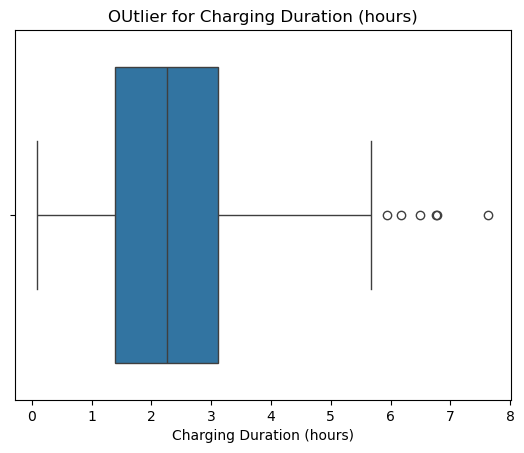

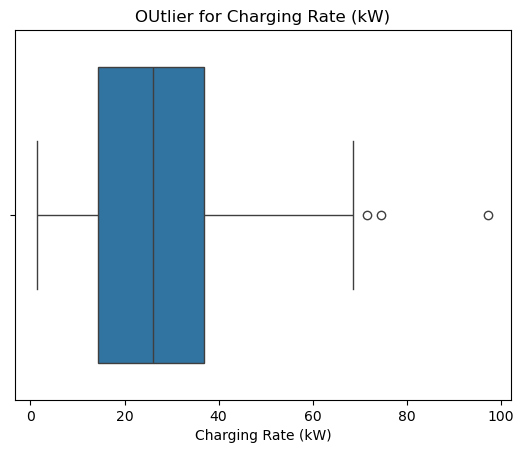

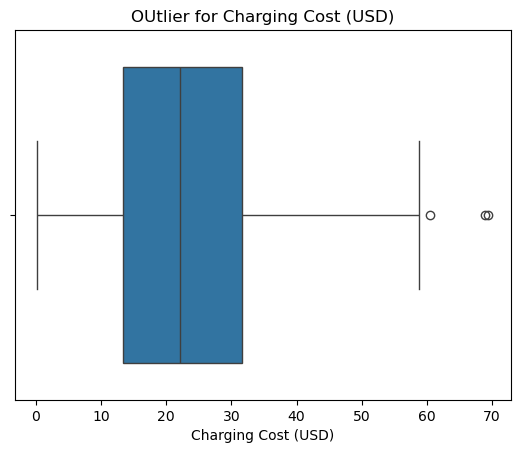

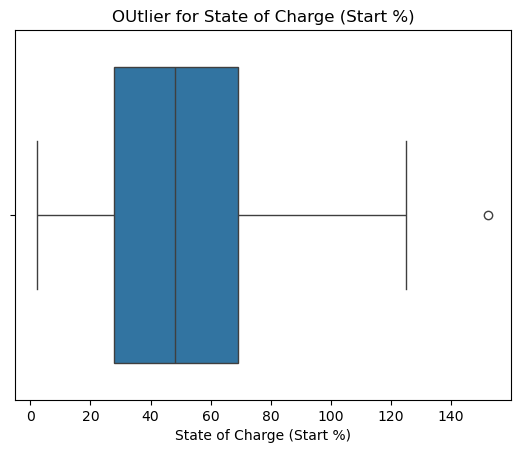

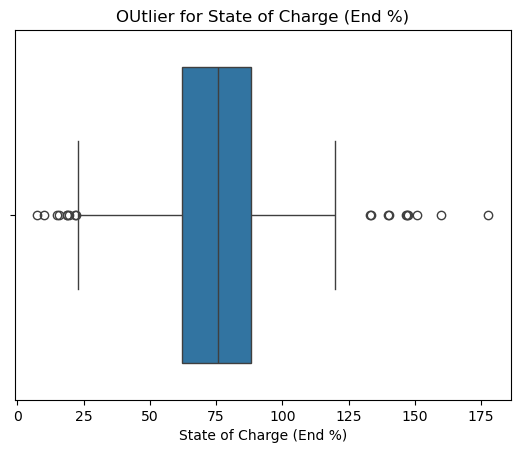

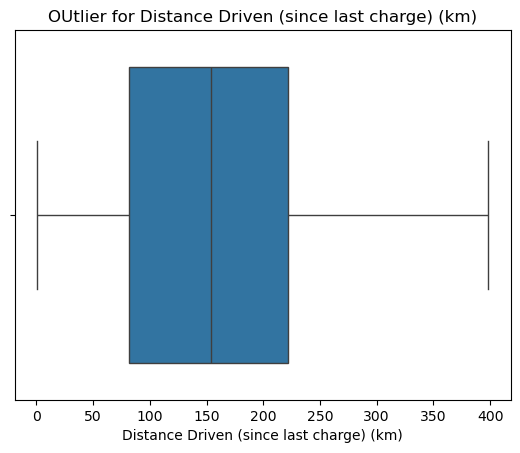

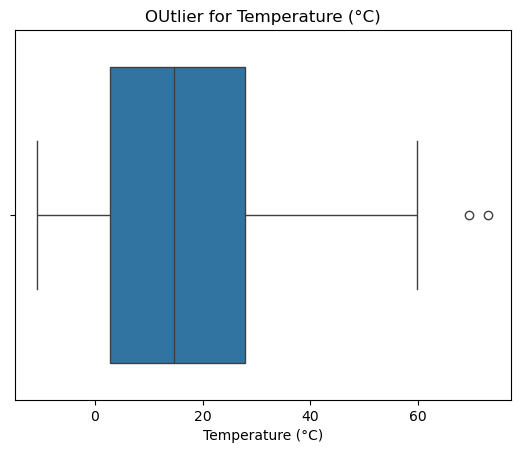

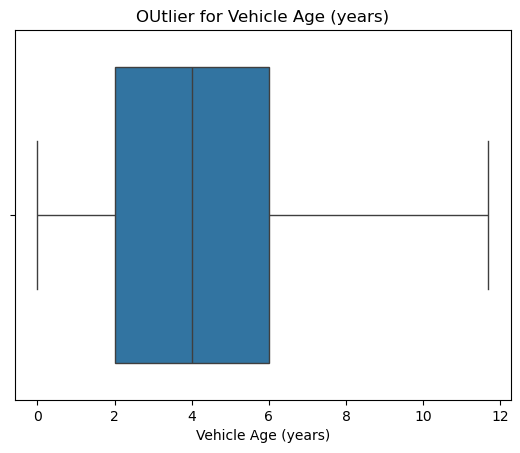

In [20]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"OUtlier for {col}")
    plt.show()

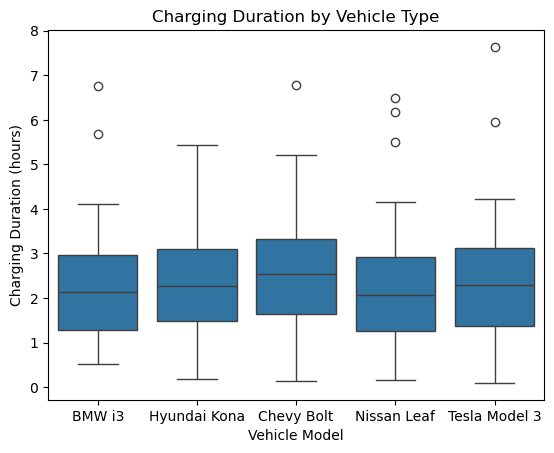

In [21]:
# hangi araç tipi daha uzun şarj oluyor
plt.figure()
sns.boxplot(x="Vehicle Model", y="Charging Duration (hours)",data=df)
plt.title("Charging Duration by Vehicle Type")
plt.show()

In [22]:
#Feature Engineering

In [23]:
df.tail()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 19:00:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:00:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 21:00:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 22:00:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter
1319,User_1320,Nissan Leaf,120.447195,Station_128,Los Angeles,2024-02-24 23:00:00,2024-02-24 23:00:00,63.652570,3.740970,33.704226,10.863674,Evening,Monday,59.338076,56.692439,14.449236,-6.966593,5.0,DC Fast Charger,Commuter


In [24]:
df["Energy_per_km"]=df["Energy Consumed (kWh)"] / df["Distance Driven (since last charge) (km)"]

In [25]:
df["SOC_Gained"] = df["State of Charge (End %)"] - df["State of Charge (Start %)"] 

In [30]:
df["Energy_per_km"].corr(df["Charging Rate (kW)"])

np.float64(-0.026439858042193915)

In [31]:
correlation_matrix = df.corr(numeric_only=True)

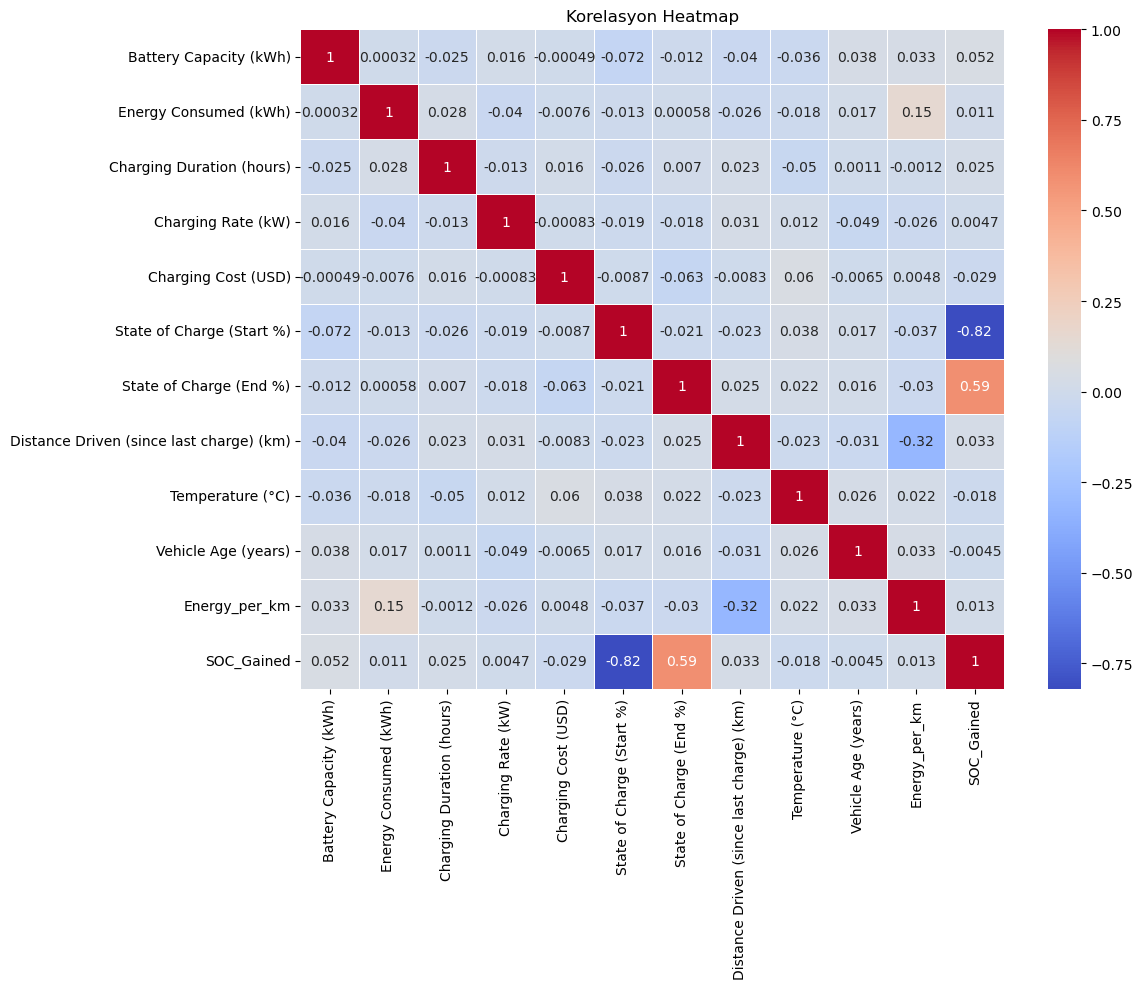

In [32]:
plt.figure(figsize =(12,10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=.5,
)
plt.title("Korelasyon Heatmap")
plt.tight_layout()
plt.show()

In [34]:
#ENCODİNG
categorical_cols

Index(['User ID', 'Vehicle Model', 'Charging Station ID',
       'Charging Station Location', 'Charging Start Time', 'Charging End Time',
       'Time of Day', 'Day of Week', 'Charger Type', 'User Type'],
      dtype='object')

In [87]:
df_clean = pd.get_dummies(df,columns=['Day of Week','Time of Day','Vehicle Model'],prefix ="TOD")
charger_mapping = {
    'Level 1': 1,
    'Level 2': 2,
    'DC Fast Charger': 3
}
df_clean['Charger_Type_Encoded'] = df_clean['Charger Type'].map(charger_mapping)

In [88]:
df_clean.columns

Index(['User ID', 'Battery Capacity (kWh)', 'Charging Station ID',
       'Charging Station Location', 'Charging Start Time', 'Charging End Time',
       'Energy Consumed (kWh)', 'Charging Duration (hours)',
       'Charging Rate (kW)', 'Charging Cost (USD)',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type', 'Energy_per_km',
       'SOC_Gained', 'TOD_Friday', 'TOD_Monday', 'TOD_Saturday', 'TOD_Sunday',
       'TOD_Thursday', 'TOD_Tuesday', 'TOD_Wednesday', 'TOD_Afternoon',
       'TOD_Evening', 'TOD_Morning', 'TOD_Night', 'TOD_BMW i3',
       'TOD_Chevy Bolt', 'TOD_Hyundai Kona', 'TOD_Nissan Leaf',
       'TOD_Tesla Model 3', 'Charger_Type_Encoded'],
      dtype='object')

In [42]:
#MODEL 

In [112]:
from sklearn.model_selection import train_test_split
X=df_clean[["Energy Consumed (kWh)"]]
y=df_clean["Charging Duration (hours)"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2 ,random_state=42)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [114]:
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [115]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train =model.predict(X_train)
y_pred_test=model.predict(X_test)

In [116]:
y_pred_train

array([2.25188803, 2.23939753, 2.22589879, ..., 2.22982817, 2.26399869,
       2.23425965])

In [117]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [118]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1.1549989227931015
0.8572401917387246
1.0747087618481117


In [119]:
from sklearn.metrics import r2_score
score =r2_score(y_test,y_pred_test)

In [120]:
score

0.0012900376370084121

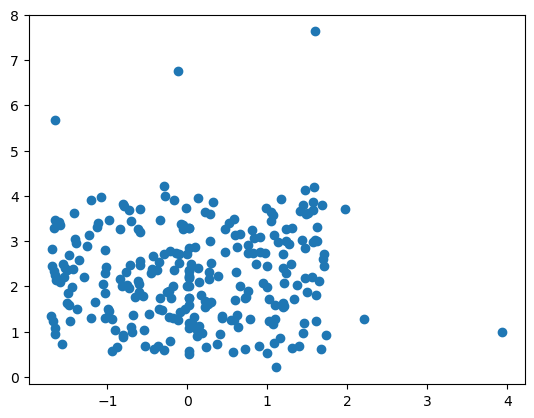

In [121]:
plt.scatter(X_test,y_test)
plt.show()